# A. Modeling

In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split

## Check data

In [2]:
label_df = pd.read_csv('data/hw3_credit_risk.csv', index_col=0)
label_df

,customer_id,credit_label,credit_rating,credit_score,approval_status,reject_reason,credit_limit,application_date,application_reason,disbursement_date
0,11251,Bad,Kém,377,Từ chối,Điểm tín dụng thấp,NaN,2022-04-13,Mua đồ trang sức,NaN
1,10248,Good,Tốt,713,Chấp nhận,NaN,50000000.0,2022-11-25,Thanh toán khoản vay cũ,2022-12-09
2,667,Good,Tốt,707,Chấp nhận,NaN,35000000.0,2022-07-21,Thanh toán khoản vay cũ,2022-08-07
3,4141,Good,Tốt,696,Chấp nhận,NaN,35000000.0,2022-05-18,Mua sắm thiết bị gia đình,2022-06-05
4,45850,Good,Tốt,696,Chấp nhận,NaN,35000000.0,2022-01-16,Đi du lịch,2022-02-01
...,...,...,...,...,...,...,...,...,...,...
4995,96925,Good,Tốt,710,Chấp nhận,NaN,45000000.0,2022-03-16,Đi du lịch,2022-04-02
4996,17991,Good,Tốt,710,Chấp nhận,NaN,45000000.0,2022-11-12,Mua mô tô,2022-12-06
4997,677,Good,Tốt,693,Chấp nhận,NaN,50000000.0,2022-06-12,Mua điện thoại/smartphone,2022-06-28
4998,77160,Good,Tốt,696,Chấp nhận,NaN,35000000.0,2022-01-26,Thanh toán chi phí gia đình,2022-02-13


## F_CUSTOMER_METAINFO

In [3]:
combinedData_df = pd.read_csv('data/hw3_f_customer_metainfo.csv', index_col=0)
combinedData_df

,customer_id,credit_label,member_id,full_name,gender,date_of_birth,address,city,country,phone_number,...,total_tax_amount,income_source,annually_income_segment,monthly_income,total_property_value,top_property_type,in_debt,monthly_bill_amount,total_annual_bill_amount,num_bill_overdue
0,50419,Good,50419,Võ Thành H***g,Nữ,1998-12-23,"1614/76/69/34/259, Đường Số 10, Phường Linh Tâ...",Đồng Nai,Việt Nam,001-840-870-5465x539,...,7665000,Kinh doanh online,Trên 3 tỷ,900000000,1100000000,Nhà ở chính,Có,43300000,555240000,13
1,458,Good,458,Mạc Hồng H**h,Nữ,2001-04-15,"760/45/196h, Đường Võ Văn C, Phường 6, Quận 11...",Hà Nội,Việt Nam,674-533-3993,...,9071000,Kinh doanh truyền thống,Trên 3 tỷ,615000000,400000000,Bất động sản thương mại,Có,31600000,289176000,14
2,20532,Good,20532,Sơn Thành L**h,Nữ,1995-12-25,"962/74/78/106, Cách Mạng Tháng Tám, Phường An ...",Bình Dương,Việt Nam,841-221-6697,...,7921000,Đầu tư,Dưới 300 triệu,646000000,300000000,Đất đai,Có,49800000,243228000,8
3,11655,Good,11655,Phú Lan B**h,Nam,1997-09-03,"551/71, Lý Tự Trọng, Phường Linh Trung, Quận 3...",Hồ Chí Minh,Việt Nam,7904248562,...,5771000,Kinh doanh truyền thống,Dưới 300 triệu,628000000,700000000,Căn hộ/Chung cư,Có,30300000,30948000,21
4,43585,Good,43585,Trần Thúy T***h,Nữ,1994-02-27,"253/224, Cô Bắc, Phường Bình Trưng Tây, Quận B...",Bắc Giang,Việt Nam,+1-375-668-3118x3238,...,1188000,Đầu tư,Trên 1 tỷ,278000000,1100000000,Bất động sản thương mại,Không,38800000,458592000,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,65554,Good,65554,Lý Đạt Q***n,Nam,2005-07-10,"628/92/29b, Đường Hùng Vương, Phường An Khánh,...",Bình Dương,Việt Nam,826-991-7704x7559,...,2687000,Cho thuê,Dưới 300 triệu,464000000,1600000000,Nhà ở chính,Không,35300000,40356000,14
4996,16826,Good,16826,Thái Lan H***n,Nam,1997-05-03,"2776/2/80, Lê Đức Thọ, Phường 12, Đông Anh, Hà...",Hà Nội,Việt Nam,001-613-720-7440x3498,...,8608000,Kinh doanh truyền thống,Từ 300 triệu tới 1 tỷ,921000000,700000000,Bất động sản thương mại,Có,43300000,519912000,24
4997,78517,Good,78517,Lý Ngọc N*a,Nam,2005-12-12,"1682/65/11/30, Trần Quang Khải, Phường 4, Sơn ...",Hà Tĩnh,Việt Nam,+1-939-749-6826x388,...,5370000,Kinh doanh truyền thống,Trên 3 tỷ,769000000,900000000,Đất đai,Có,15700000,499848000,22
4998,95252,Good,95252,Lỗ Hoàng H*a,Nam,1997-01-31,"391/72/18, Trương Đăng Quế, Phường Bình Trưng ...",Nam Định,Việt Nam,(738)614-0525,...,9677000,Đầu tư,Trên 3 tỷ,571000000,600000000,Đất đai,Có,35300000,49956000,17


In [4]:
customer_id_info = combinedData_df[[
    'customer_id', 'member_id', 'full_name', 'gender', 'date_of_birth',
    'address', 'phone_number', 'email', 'join_date', 'expiry_date', 'referral_code']]

### Meta feature Columns

In [5]:
member_info_cols = [
    'membership_lifespan',
    'num_day_since_last_active',
    'num_active_last_7d',
    'num_active_last_14d',
    'num_active_last_30d',
    'signup_in_latenight',
    'most_active_hour',
    'num_apply_lending'
]

In [6]:
txn_info_cols = [
    'total_amount_spent',
    'total_amount_spent_last_30d',
    'total_amount_spent_last_60d',
    'total_amount_spent_last_90d',
    'total_amount_spent_last_180d',
    'total_amount_spent_last_365d',
    'total_tax_amount_spent',
    'total_fee_amount_spent',
    'num_completed_txn',
    'num_canceled_txn',
    'num_reject_txn',
    'pct_reject2total_txn',
    'top_rejected_reason',
    'num_refunded_txn',
    'top_refunded_reason',
    'top_payment_method',
    'top_payment_channel',
    'is_ordering_shipping_address_same'
]

In [14]:
promotion_info_cols = [
    'prob_abuse_promotion',
    'num_used_promotion',
    'prob_abnormal_activity',
    'num_select_promotion',
    'num_interest_products'
]

In [15]:
income_info_cols = [
    'income_spending_ratio',
    'income_stability',
    'total_tax_amount',
    'income_source',
    'annually_income_segment'
]

In [16]:
asset_info_cols = [
    'top_property_type',
    'in_debt'
]

In [17]:
bill_info_cols = [
    'monthly_bill_amount',
    'total_annual_bill_amount'
]

### Finalize Feature DataFrame

In [18]:
feature_df = combinedData_df[member_info_cols + txn_info_cols + promotion_info_cols + income_info_cols + asset_info_cols + bill_info_cols]
feature_df

,membership_lifespan,num_day_since_last_active,num_active_last_7d,num_active_last_14d,num_active_last_30d,signup_in_latenight,most_active_hour,num_apply_lending,total_amount_spent,total_amount_spent_last_30d,...,num_interest_products,income_spending_ratio,income_stability,total_tax_amount,income_source,annually_income_segment,top_property_type,in_debt,monthly_bill_amount,total_annual_bill_amount
0,837,354,252,303,915,False,3,10,1534419000,258057000,...,29,0.123289,Rất ổn định,7665000,Kinh doanh online,Trên 3 tỷ,Nhà ở chính,Có,43300000,555240000
1,311,72,187,69,1000,True,3,19,8341801000,388076000,...,10,0.325329,Rất ổn định,9071000,Kinh doanh truyền thống,Trên 3 tỷ,Bất động sản thương mại,Có,31600000,289176000
2,849,166,164,226,240,False,21,15,4350035000,924929000,...,44,0.633699,Ổn định,7921000,Đầu tư,Dưới 300 triệu,Đất đai,Có,49800000,243228000
3,821,37,32,273,630,True,6,2,8591000,508054000,...,43,0.068492,Rất ổn định,5771000,Kinh doanh truyền thống,Dưới 300 triệu,Căn hộ/Chung cư,Có,30300000,30948000
4,527,15,131,473,680,True,1,4,1153566000,935648000,...,12,0.162109,Ổn định,1188000,Đầu tư,Trên 1 tỷ,Bất động sản thương mại,Không,38800000,458592000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,291,234,269,139,116,False,1,9,2072782000,275952000,...,31,0.777069,Ổn định,2687000,Cho thuê,Dưới 300 triệu,Nhà ở chính,Không,35300000,40356000
4996,349,283,287,174,969,True,3,15,5414463000,987647000,...,42,0.430812,Tạm ổn,8608000,Kinh doanh truyền thống,Từ 300 triệu tới 1 tỷ,Bất động sản thương mại,Có,43300000,519912000
4997,159,359,193,197,939,True,21,5,6917287000,135374000,...,15,0.546895,Rất ổn định,5370000,Kinh doanh truyền thống,Trên 3 tỷ,Đất đai,Có,15700000,499848000
4998,588,306,224,232,817,True,3,16,8862443000,993065000,...,48,0.341516,Rất ổn định,9677000,Đầu tư,Trên 3 tỷ,Đất đai,Có,35300000,49956000


In [19]:
feature_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 0 to 4999
Data columns (total 40 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   membership_lifespan                5000 non-null   int64  
 1   num_day_since_last_active          5000 non-null   int64  
 2   num_active_last_7d                 5000 non-null   int64  
 3   num_active_last_14d                5000 non-null   int64  
 4   num_active_last_30d                5000 non-null   int64  
 5   signup_in_latenight                5000 non-null   bool   
 6   most_active_hour                   5000 non-null   int64  
 7   num_apply_lending                  5000 non-null   int64  
 8   total_amount_spent                 5000 non-null   int64  
 9   total_amount_spent_last_30d        5000 non-null   int64  
 10  total_amount_spent_last_60d        5000 non-null   int64  
 11  total_amount_spent_last_90d        5000 non-null   int64  
 1

## 1. Feature Engineering
#### Input

In [20]:
# Columns are not number type
feature_df.select_dtypes(include=[object, bool])

,signup_in_latenight,top_rejected_reason,top_refunded_reason,top_payment_method,top_payment_channel,is_ordering_shipping_address_same,income_stability,income_source,annually_income_segment,top_property_type,in_debt
0,False,Sản phẩm không đáp ứng yêu cầu của khách hàng,Khách hàng không nhận được hàng,Thanh toán qua cổng thanh toán trực tuyến,Cửa hàng trực tiếp,False,Rất ổn định,Kinh doanh online,Trên 3 tỷ,Nhà ở chính,Có
1,True,Sản phẩm không đáp ứng yêu cầu của khách hàng,Sản phẩm gửi sai,Thanh toán bằng QR Code,Điểm thanh toán tự động,False,Rất ổn định,Kinh doanh truyền thống,Trên 3 tỷ,Bất động sản thương mại,Có
2,False,Sản phẩm giao muộn so với hẹn giao,Vấn đề khác,Thanh toán qua cổng thanh toán trực tuyến,Cổng thanh toán của bên thứ ba,False,Ổn định,Đầu tư,Dưới 300 triệu,Đất đai,Có
3,True,Sản phẩm giao muộn so với hẹn giao,Khách hàng không nhận được hàng,Thẻ tín dụng,Cửa hàng trực tiếp,True,Rất ổn định,Kinh doanh truyền thống,Dưới 300 triệu,Căn hộ/Chung cư,Có
4,True,Sản phẩm không hoạt động đúng cách,"Khách hàng đổi ý, không muốn mua nữa",Thanh toán qua cổng thanh toán trực tuyến,Cổng thanh toán của bên thứ ba,False,Ổn định,Đầu tư,Trên 1 tỷ,Bất động sản thương mại,Không
...,...,...,...,...,...,...,...,...,...,...,...
4995,False,Vấn đề khác,Sản phẩm không đúng mô tả,Thanh toán qua cổng thanh toán trực tuyến,Giao diện thanh toán trực tuyến trên website,True,Ổn định,Cho thuê,Dưới 300 triệu,Nhà ở chính,Không
4996,True,Sản phẩm không đáp ứng yêu cầu của khách hàng,Sản phẩm nhận không đủ số lượng,Tiền mặt khi nhận hàng (COD),Ứng dụng điện thoại di động,True,Tạm ổn,Kinh doanh truyền thống,Từ 300 triệu tới 1 tỷ,Bất động sản thương mại,Có
4997,True,Sản phẩm giao muộn so với hẹn giao,Khách hàng không nhận được hàng,Thanh toán qua cổng thanh toán trực tuyến,Giao diện thanh toán trực tuyến trên website,False,Rất ổn định,Kinh doanh truyền thống,Trên 3 tỷ,Đất đai,Có
4998,True,Dịch vụ không chuyên nghiệp,Sản phẩm bị hỏng trong quá trình vận chuyển,Thẻ tín dụng,Cổng thanh toán của bên thứ ba,True,Rất ổn định,Đầu tư,Trên 3 tỷ,Đất đai,Có


In [21]:
# Columns are number type
feature = feature_df.select_dtypes(exclude=[object, bool])
feature

,membership_lifespan,num_day_since_last_active,num_active_last_7d,num_active_last_14d,num_active_last_30d,most_active_hour,num_apply_lending,total_amount_spent,total_amount_spent_last_30d,total_amount_spent_last_60d,...,num_refunded_txn,prob_abuse_promotion,num_used_promotion,prob_abnormal_activity,num_select_promotion,num_interest_products,income_spending_ratio,total_tax_amount,monthly_bill_amount,total_annual_bill_amount
0,837,354,252,303,915,3,10,1534419000,258057000,965126000,...,6,0.232340,70,0.94,312,29,0.123289,7665000,43300000,555240000
1,311,72,187,69,1000,3,19,8341801000,388076000,734228000,...,2,0.522664,87,0.46,926,10,0.325329,9071000,31600000,289176000
2,849,166,164,226,240,21,15,4350035000,924929000,202899000,...,7,0.627745,58,0.78,583,44,0.633699,7921000,49800000,243228000
3,821,37,32,273,630,6,2,8591000,508054000,872911000,...,13,0.378317,81,0.51,985,43,0.068492,5771000,30300000,30948000
4,527,15,131,473,680,1,4,1153566000,935648000,153210000,...,1,0.558942,63,0.11,657,12,0.162109,1188000,38800000,458592000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,291,234,269,139,116,1,9,2072782000,275952000,748218000,...,5,0.351637,8,0.99,42,31,0.777069,2687000,35300000,40356000
4996,349,283,287,174,969,3,15,5414463000,987647000,611397000,...,11,0.245048,92,0.27,737,42,0.430812,8608000,43300000,519912000
4997,159,359,193,197,939,21,5,6917287000,135374000,934702000,...,4,0.043947,39,0.23,768,15,0.546895,5370000,15700000,499848000
4998,588,306,224,232,817,3,16,8862443000,993065000,38556000,...,7,0.681627,27,0.11,886,48,0.341516,9677000,35300000,49956000


#### Output
X is input data, y is output (or target)

In [22]:
X = feature 
y = label_df['credit_label']

In [23]:
X

,membership_lifespan,num_day_since_last_active,num_active_last_7d,num_active_last_14d,num_active_last_30d,most_active_hour,num_apply_lending,total_amount_spent,total_amount_spent_last_30d,total_amount_spent_last_60d,...,num_refunded_txn,prob_abuse_promotion,num_used_promotion,prob_abnormal_activity,num_select_promotion,num_interest_products,income_spending_ratio,total_tax_amount,monthly_bill_amount,total_annual_bill_amount
0,837,354,252,303,915,3,10,1534419000,258057000,965126000,...,6,0.232340,70,0.94,312,29,0.123289,7665000,43300000,555240000
1,311,72,187,69,1000,3,19,8341801000,388076000,734228000,...,2,0.522664,87,0.46,926,10,0.325329,9071000,31600000,289176000
2,849,166,164,226,240,21,15,4350035000,924929000,202899000,...,7,0.627745,58,0.78,583,44,0.633699,7921000,49800000,243228000
3,821,37,32,273,630,6,2,8591000,508054000,872911000,...,13,0.378317,81,0.51,985,43,0.068492,5771000,30300000,30948000
4,527,15,131,473,680,1,4,1153566000,935648000,153210000,...,1,0.558942,63,0.11,657,12,0.162109,1188000,38800000,458592000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,291,234,269,139,116,1,9,2072782000,275952000,748218000,...,5,0.351637,8,0.99,42,31,0.777069,2687000,35300000,40356000
4996,349,283,287,174,969,3,15,5414463000,987647000,611397000,...,11,0.245048,92,0.27,737,42,0.430812,8608000,43300000,519912000
4997,159,359,193,197,939,21,5,6917287000,135374000,934702000,...,4,0.043947,39,0.23,768,15,0.546895,5370000,15700000,499848000
4998,588,306,224,232,817,3,16,8862443000,993065000,38556000,...,7,0.681627,27,0.11,886,48,0.341516,9677000,35300000,49956000


In [24]:
y

0        Bad
1       Good
2       Good
3       Good
4       Good
        ... 
4995    Good
4996    Good
4997    Good
4998    Good
4999    Good
Name: credit_label, Length: 5000, dtype: object

In [25]:
y.value_counts()

credit_label
Good    4650
Bad      350
Name: count, dtype: int64

<Axes: ylabel='count'>

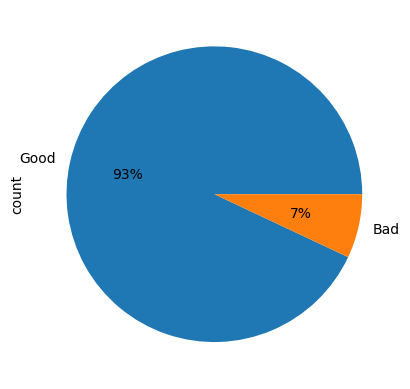

In [28]:
y.value_counts().plot(kind='pie', autopct='%1.0f%%')

## 2. Train/Test selection
Test size should be chosen around 20% - 30%

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

<Axes: ylabel='count'>

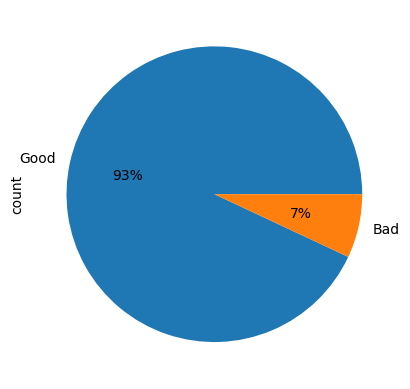

In [30]:
# Check label-ratio in every dataset
y_train.value_counts().plot(kind='pie', autopct='%1.0f%%')

<Axes: ylabel='count'>

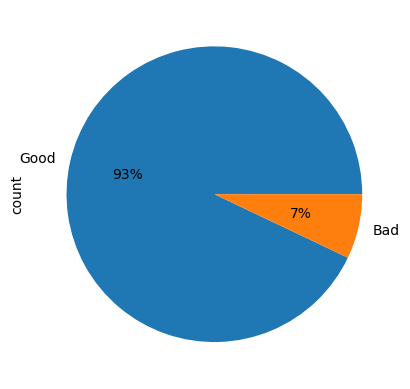

In [31]:
y_test.value_counts().plot(kind='pie', autopct='%1.0f%%')

## 3. Model Selection
Output only has 2 result which are 'Good' & 'Bad' - __binary_classification__

## 4. Training Model
### Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
log_reg_model = LogisticRegression()

In [33]:
log_reg_model.fit(X_train, y_train)

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier()

In [37]:
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

### Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier()

In [39]:
random_forest_model.fit(X_train, y_train)

RandomForestClassifier()

## 5. Evaluate Model

After training, we need to check model perfomance on test_set to ensure that model can generalize with unseen data 
### Precision & Recall

In [42]:
# get 2 trained model results
y_predict_logreg_model = log_reg_model.predict(X_test)
y_predict_decision_tree = decision_tree_model.predict(X_test)
y_predict_random_forest = random_forest_model.predict(X_test)

In [45]:
# Calculate precision and recall
from sklearn.metrics import precision_recall_fscore_support
p,r,f, _ = precision_recall_fscore_support(y_test, y_predict_logreg_model, average='binary', pos_label='Good')
print('With positive label is Good, Logistic Regression model reaches')
print(f'\tPrecision is {p:.2f}\n\tRecall is {r:.2f}\n\tF1 score is {f:.2f}')

With positive label is Good, Logistic Regression model reaches
	Precision is 0.93
	Recall is 1.00
	F1 score is 0.96


In [46]:
p,r,f, _ = precision_recall_fscore_support(y_test, y_predict_decision_tree, average='binary', pos_label='Good')
print('With positive label is Good, Decision Tree model reaches')
print(f'\tPrecision is {p:.2f}\n\tRecall is {r:.2f}\n\tF1 score is {f:.2f}')

With positive label is Good, Decision Tree model reaches
	Precision is 0.93
	Recall is 0.90
	F1 score is 0.92


In [47]:
p,r,f, _ = precision_recall_fscore_support(y_test, y_predict_random_forest, average='binary', pos_label='Good')
print('With positive label is Good, Random Forest model reaches')
print(f'\tPrecision is {p:.2f}\n\tRecall is {r:.2f}\n\tF1 score is {f:.2f}')

With positive label is Good, Random Forest model reaches
	Precision is 0.93
	Recall is 1.00
	F1 score is 0.96


# B. Scoring

In [48]:
unseen_metadata = pd.read_csv('data/hw3_marketing_testset.csv', index_col=0)
unseen_metadata

,customer_id,credit_label,member_id,full_name,gender,date_of_birth,address,city,country,phone_number,...,total_tax_amount,income_source,annually_income_segment,monthly_income,total_property_value,top_property_type,in_debt,monthly_bill_amount,total_annual_bill_amount,num_bill_overdue
0,89944,Good,89944,Vũ Bảo H**h,Nam,1996-12-07,"2336/482, Nguyễn Đức Cảnh, Phường An Khánh, Qu...",Điện Biên,Việt Nam,(413)437-1682x2757,...,5251000,Đầu tư,Trên 1 tỷ,979000000,400000000,Bất động sản thương mại,Không,41200000,359280000,16
1,16959,Good,16959,Phạm Vũ V*n,Nữ,1999-10-07,"654/971, Trần Hưng Đạo, Phường Thảo Điền, Nam ...",Cần Thơ,Việt Nam,+1-597-409-1757x7408,...,3048000,Cho thuê,Trên 1 tỷ,818000000,1700000000,Căn hộ/Chung cư,Có,11400000,232836000,19
2,8651,Good,8651,Mạc Đan T**o,Nam,2001-11-23,"2291/59/53/91, Đường Hoàng Diệu, Phường 2, Quậ...",Sơn La,Việt Nam,3324952434,...,9385000,Đầu tư,Trên 1 tỷ,885000000,1800000000,Đất đai,Không,35700000,173580000,14
3,6316,Good,6316,Đỗ Đức N**c,Nữ,1991-04-18,"1742/42/90/234/2, Huỳnh Thúc Kháng, Phường 12,...",Ninh Thuận,Việt Nam,+1-890-695-1185x336,...,7527000,Đầu tư,Trên 1 tỷ,905000000,1700000000,Căn hộ/Chung cư,Có,42000000,160932000,9
4,9187,Good,9187,Đỗ Bảo L**h,Nữ,1999-03-14,"2572/149, Đặng Văn Ngữ, Phường An Cư, Thanh Oa...",Lai Châu,Việt Nam,001-585-593-4888x9539,...,386000,Kinh doanh truyền thống,Dưới 300 triệu,871000000,1500000000,Căn hộ/Chung cư,Có,8100000,141456000,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22683,75241,Good,75241,Lục Hà T*m,Nam,1981-10-20,"86/83/31/173, Trần Huy Liệu, Phường An Hòa, Đa...",Bình Dương,Việt Nam,6906149528,...,7848000,Làm thuê,Từ 300 triệu tới 1 tỷ,2000000,1900000000,Nhà ở chính,Có,42700000,206448000,20
22684,2925,Good,2925,Lục Bảo Q**n,Nữ,1997-03-25,"1337/12/122/260/92J, Lý Tự Trọng, Phường Linh ...",Đà Nẵng,Việt Nam,609-996-5070,...,953000,Freelancer,Trên 1 tỷ,3000000,1700000000,Bất động sản thương mại,Không,29300000,550644000,20
22685,23492,Good,23492,Phú Kiên Q***n,Nữ,2004-01-18,"699/3/133/232/145T, Hoàng Văn Thụ, Phường 6, Q...",Hà Nội,Việt Nam,+1-782-573-4070x7429,...,9813000,Cho thuê,Trên 3 tỷ,18000000,1800000000,Đất đai,Có,24600000,282024000,20
22686,87861,Good,87861,Lưu Văn N*ư,Nam,1996-11-08,"1730/83/15/104, Đường Số 6, Phường Linh Đông, ...",Cần Thơ,Việt Nam,+1-617-350-7053x664,...,6331000,Làm thuê,Trên 3 tỷ,14000000,1000000000,Bất động sản thương mại,Có,26100000,479232000,11


In [49]:
unseen_label = unseen_metadata.pop('credit_label')
unseen_feat = unseen_metadata[X_train.columns]

Now, unseen_feat looks like X-test and unseen_label looks like y-test 

In [50]:
pred_unseen_log_reg = log_reg_model.predict(unseen_feat)
pred_unseen_decision_tree = decision_tree_model.predict(unseen_feat)
pred_unseen_random_forest = random_forest_model.predict(unseen_feat)

In [51]:
p,r,f, _ = precision_recall_fscore_support(unseen_label, pred_unseen_log_reg, average='binary', pos_label='Good')
print('With positive label is Good, Logistic Regression model reaches')
print(f'\tPrecision is {p:.2f}\n\tRecall is {r:.2f}\n\tF1 score is {f:.2f}')

With positive label is Good, Logistic Regression model reaches
	Precision is 0.73
	Recall is 1.00
	F1 score is 0.85


In [52]:
p,r,f, _ = precision_recall_fscore_support(unseen_label, pred_unseen_decision_tree, average='binary', pos_label='Good')
print('With positive label is Good, Decision Tree model reaches')
print(f'\tPrecision is {p:.2f}\n\tRecall is {r:.2f}\n\tF1 score is {f:.2f}')

With positive label is Good, Decision Tree model reaches
	Precision is 0.74
	Recall is 0.91
	F1 score is 0.81


In [53]:
p,r,f, _ = precision_recall_fscore_support(unseen_label, pred_unseen_random_forest, average='binary', pos_label='Good')
print('With positive label is Good, Random Forest model reaches')
print(f'\tPrecision is {p:.2f}\n\tRecall is {r:.2f}\n\tF1 score is {f:.2f}')

With positive label is Good, Random Forest model reaches
	Precision is 0.73
	Recall is 1.00
	F1 score is 0.85
